<IPython.core.display.Javascript object>


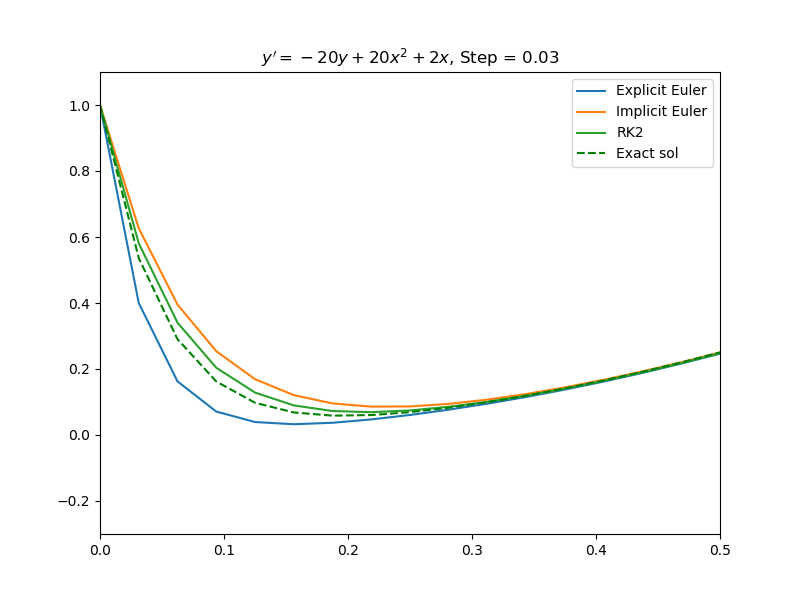

interactive(children=(FloatSlider(value=0.03, description='step', max=0.15, min=0.01, step=0.01), Output()), _…

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import ipywidgets as widgets
from ipywidgets import interact

fig, ax = plt.subplots(1, figsize=(8, 6))
T  = 0.5
y0 = 1.0

func = lambda y, t: -20*y+20*t*t+2*t
fsol = lambda t: np.exp(-20*t)+t*t

def update_plot(step=0.03):
    N  = int(T/step)+1
    ts = np.linspace(0, T, N)
    y_ee = np.zeros((N,))
    y_ee[0] = y0
    y_ie = np.zeros((N,))
    y_ie[0] = y0
    y_rk = np.zeros((N,))
    y_rk[0] = y0

    for _i in range(1,N):
        _t = ts[_i-1]

        # Exp. Euler
        y_ee[_i] = y_ee[_i-1] + step * func(y_ee[_i-1], _t)

        # Imp. Euler
        _f = lambda y: y_ie[_i-1] + step * func(y, ts[_i]) - y
        _sol = root_scalar(_f, x0=y_ie[_i-1], x1=2.0)
        y_ie[_i] = _sol.root

        # RK2
        _k1 = step * func(y_rk[_i-1], _t)
        _k2 = step * func(y_rk[_i-1]+0.5*_k1, _t+0.5*step)
        y_rk[_i] = y_rk[_i-1] + _k2

    ax.clear()
    ax.plot(ts, y_ee, label='Explicit Euler')
    ax.plot(ts, y_ie, label='Implicit Euler')
    ax.plot(ts, y_rk, label='RK2')
    ax.plot(ts, fsol(ts), 'g--', label='Exact sol')
    ax.set_title(r"$y'=-20y+20x^2+2x$, Step = {0}".format(step))
    ax.set_xlim(0, T)
    ax.set_ylim(-0.3, 1.1)
    ax.legend(loc=1)
    plt.show()

# widgets.interactive(update_plot, step=(0.01,0.15,0.01))
interact(update_plot, step=(0.01,0.15,0.01));